#codigo en diferentes celdas

In [ ]:
import zipfile

# Ruta del archivo ZIP que deseas descomprimir
archivo_zip = "/content/Gupy_dataset-20231104T191923Z-001 (1).zip"

# Ruta del directorio donde deseas extraer los archivos
directorio_destino = "/content"

# Abre el archivo ZIP
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    # Extrae todos los archivos en el directorio de destino
    zip_ref.extractall(directorio_destino)

print(f"Archivos descomprimidos en {directorio_destino}")

In [34]:
#importar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import cv2
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

In [35]:
# Ruta de la carpeta donde se encuentran las imágenes
carpeta_imagenes = '/content/Gupy_dataset-20231104T191923Z-001/Gupy_dataset'

# Cargar el Dataset
csv_path = '/content/labels_my-project-name_2023-11-04-03-14-11.csv'
data = pd.read_csv(csv_path, encoding='latin-1')


In [36]:
# Reemplazar las etiquetas "gupy" por 1 y "nongupy" por 0
data['label_name'] = data['label_name'].map({'GUPY': 1, 'nongupy': 0})

# Extraer características relevantes de la caja delimitadora (bbox)
X = data[['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']].values

In [37]:
# Etiquetas
y = data['label_name'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear un modelo de Perceptrón
perceptron = Perceptron(max_iter=1000, random_state=42)

# Entrenar el Perceptrón
perceptron.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = perceptron.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Perceptrón: {:.2f}%".format(accuracy * 100))


Precisión del Perceptrón: 97.80%


In [38]:
# Seleccionar una imagen aleatoria del conjunto de datos
fila_aleatoria = random.choice(data.index)
imagen_nombre = data.at[fila_aleatoria, 'image_name']

# Ruta completa de la imagen en la carpeta
ruta_imagen = os.path.join(carpeta_imagenes, imagen_nombre)

# Extraer características de la caja delimitadora de la imagen aleatoria
bounding_box = data.iloc[fila_aleatoria, 1:5].values

# Normalizar las características de la caja delimitadora de la imagen aleatoria
bounding_box_normalizada = scaler.transform([bounding_box])

# Realizar la predicción en función de la caja delimitadora de la imagen aleatoria
prediccion = perceptron.predict(bounding_box_normalizada)

La imagen 7f64a641b3576c2c522f995e2456623a.jpg es: NONGUPY


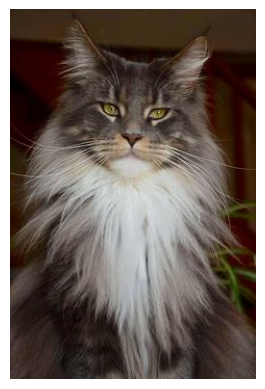

In [39]:
# Mapear la predicción a "GUPY" o "NONGUPY"
if prediccion == 1:
    resultado = "GUPY"
else:
    resultado = "NONGUPY"

# Imprimir el nombre de la imagen y la predicción
print("La imagen", imagen_nombre, "es:", resultado)

# Mostrar la imagen con matplotlib
imagen = Image.open(ruta_imagen)
plt.imshow(imagen)
plt.axis('off')  # Ocultar ejes
plt.show()

#codigo en una sola celda

In [ ]:
# Mapear la predicción a "GUPY" o "NONGUPY"
if prediccion == 1:
    resultado = "GUPY"
else:
    resultado = "NONGUPY"

# Imprimir el nombre de la imagen y la predicción
print("La imagen", imagen_nombre, "es:", resultado)

# Mostrar la imagen con matplotlib
imagen = Image.open(ruta_imagen)
plt.imshow(imagen)
plt.axis('off')  # Ocultar ejes
plt.show()

Precisión del Perceptrón: 97.80%
La imagen 324547503_224904496545344_2441730369755970581_n.jpg es: GUPY


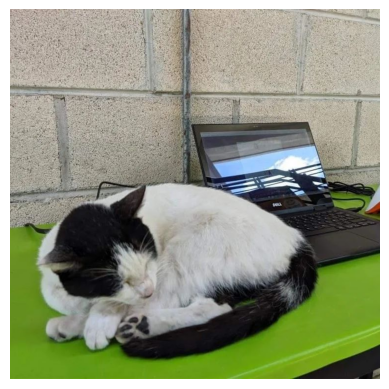

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import cv2
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de la carpeta donde se encuentran las imágenes
carpeta_imagenes = '/content/Gupy_dataset-20231104T191923Z-001/Gupy_dataset'

# Cargar el Dataset
csv_path = '/content/labels_my-project-name_2023-11-04-03-14-11.csv'
data = pd.read_csv(csv_path, encoding='latin-1')

# Reemplazar las etiquetas "gupy" por 1 y "nongupy" por 0
data['label_name'] = data['label_name'].map({'GUPY': 1, 'nongupy': 0})

# Extraer características relevantes de la caja delimitadora (bbox)
X = data[['bbox_x', 'bbox_y', 'bbox_width', 'bbox_height']].values

# Etiquetas
y = data['label_name'].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear un modelo de Perceptrón
perceptron = Perceptron(max_iter=1000, random_state=42)

# Entrenar el Perceptrón
perceptron.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = perceptron.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Perceptrón: {:.2f}%".format(accuracy * 100))

# Seleccionar una imagen aleatoria del conjunto de datos
fila_aleatoria = random.choice(data.index)
imagen_nombre = data.at[fila_aleatoria, 'image_name']

# Ruta completa de la imagen en la carpeta
ruta_imagen = os.path.join(carpeta_imagenes, imagen_nombre)

# Extraer características de la caja delimitadora de la imagen aleatoria
bounding_box = data.iloc[fila_aleatoria, 1:5].values

# Normalizar las características de la caja delimitadora de la imagen aleatoria
bounding_box_normalizada = scaler.transform([bounding_box])

# Realizar la predicción en función de la caja delimitadora de la imagen aleatoria
prediccion = perceptron.predict(bounding_box_normalizada)

# Mapear la predicción a "GUPY" o "NONGUPY"
if prediccion == 1:
    resultado = "GUPY"
else:
    resultado = "NONGUPY"

# Imprimir el nombre de la imagen y la predicción
print("La imagen", imagen_nombre, "es:", resultado)

# Mostrar la imagen con matplotlib
imagen = Image.open(ruta_imagen)
plt.imshow(imagen)
plt.axis('off')  # Ocultar ejes
plt.show()